## Data analysis and plots https://programmer.help/blogs/5dd2674989197.html

## Data preparation is the first step of any data analysis. We need to ensure that data is clean and then pick up an adequate method to analyze the data. Notably, we have several tools for plotting in Python. The basic one is matplotlib and there are other libraries that are built on top of it, such as seaborn and bokeh.

## By the end of this workshop, a learner should be able to:
###  (1) know how to implement the a few different types of plots such as histograms, boxplots, etc.
###  (2) be familar with seaborn as well as matplotlib (in addition to the numpy and pandas libraries)

## The library provides a database of useful datasets for educational purposes that can be loaded by typing:
## seaborn.load_dataset(name, cache=True, data_home=None, **kws)
## For information on what these datasets are : https://github.com/mwaskom/seaborn-data

In [1]:
# Try to remove the # shown in the next line and see what happens
# pwd

In [2]:
'''
import pandas as pd
titanic_test=pd.read_csv("https://data.world/nrippner/titanic-disaster-dataset/titanic.csv")
titanic_test.head()

Notes: We may try to "manually download the file or use API tool(s) to download the data 
Generally speakingly, retrieving data from the Internet (web crawling) is possible but 
could be a challenge

'''

'\nimport pandas as pd\ntitanic_test=pd.read_csv("https://data.world/nrippner/titanic-disaster-dataset/titanic.csv")\ntitanic_test.head()\n\nNotes: We may try to "manually download the file or use API tool(s) to download the data \nGenerally speakingly, retrieving data from the Internet (web crawling) is possible but \ncould be a challenge\n\n'

In [3]:
# cd ..

In [4]:
# cd C:\Users\xiada\Documents\...\2020_xiada

In [5]:
## It is assumed that you have successfulled installed the pandas, matplotlib, numpy and seaborn libries via Anaconda. 

### If you are a Jupyter Notebook or JupyterLab user, you may try this command to get seaborn insalled:   !pip install seaborn

## Seaborn Introduction
https://seaborn.pydata.org/introduction.html

https://harvard-iacs.github.io/2019-CS109A/labs/lab-5/solutions/

In [6]:
!pip install seaborn

In [7]:
import seaborn as sns, numpy as np, pandas as pd, \
matplotlib.pyplot as plt 

# matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)[source]
# Create a figure and a set of subplots, including the enclosing figure object, in a single call.


'''
# Alternatively, we may try something like: 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
'''

'\n# Alternatively, we may try something like: \n\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sns\n'

## Seaborn is a library for making statistical graphics in Python. 

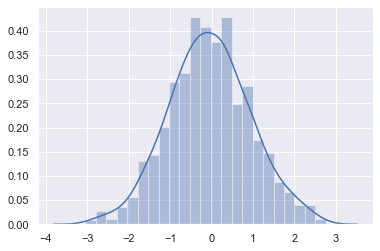

In [8]:
sns.set()
np.random.seed(0)
x = np.random.randn(1000)
ax = sns.distplot(x)

In [9]:
# An easy way to detect various missing-data formats is to put them in a list. Then when we import the data, 
# Pandas will recognize them right away. Here’s an example of how we would do that.
# Making a list of missing value types
missing_values = ["n/a", "na", "NA", "--", "nan", "null", ".", "Missing", " ", ""]

In [10]:
titanic_data = pd.read_csv("titanic.csv", na_values = missing_values, skip_blank_lines=True, skiprows=[1310])
titanic_data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [11]:
# type(titanic_data['fare'])
titanic_data['fare'].mean()
# index_col='a variable in the data set that we would like to set as an ID'

33.29547928134557

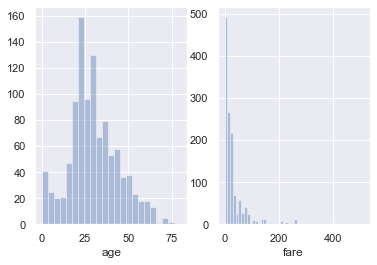

In [12]:
# We can activate a grid with the grid(True) method call.
# To change the number of bins or hide the line, we can pass the number of bins and tell the line (kde) to be invisible.
fig,axes=plt.subplots(1,2)
sns.distplot(titanic_data['age'], kde = False,ax=axes[0])
plt.grid(True)
sns.distplot(titanic_data['fare'], kde = False,ax=axes[1])
plt.show()

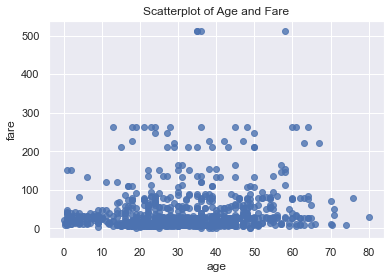

In [13]:
scatter, ax=plt.subplots()
ax=sns.regplot(x='age', y ='fare', data=titanic_data, fit_reg=False)
ax.set_title('Scatterplot of Age and Fare')
ax.set_xlabel('age')
ax.set_ylabel('fare')
plt.show()

# Turn fit_reg on and we can add a "regression line" to the scatterplt (fit_reg=True)

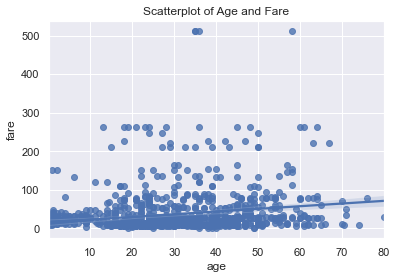

In [14]:
scatter, ax=plt.subplots()
ax=sns.regplot(x='age', y ='fare', data=titanic_data, fit_reg=True)
ax.set_title('Scatterplot of Age and Fare')
ax.set_xlabel('age')
ax.set_ylabel('fare')
plt.show()

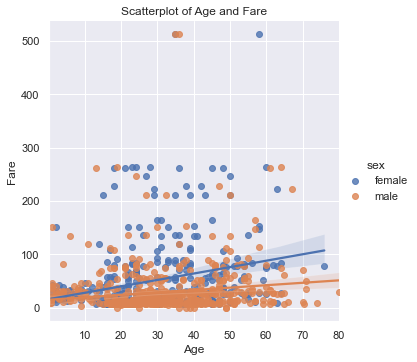

In [15]:
ax=sns.lmplot(x='age', y ='fare', hue='sex', data=titanic_data, fit_reg=True)
plt.title('Scatterplot of Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

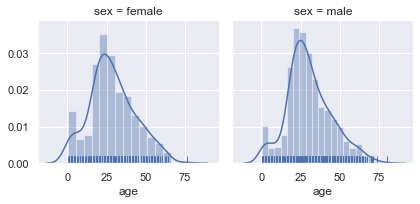

In [16]:
facet=sns.FacetGrid(titanic_data, col='sex')
facet.map(sns.distplot, 'age', rug=True)
plt.show()

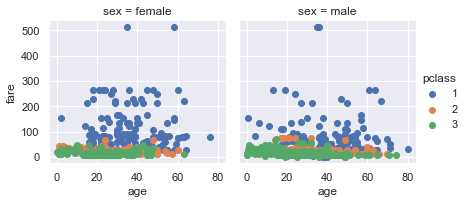

In [17]:
facet=sns.FacetGrid(titanic_data, col='sex', hue='pclass')
facet=facet.map(plt.scatter, 'age', 'fare')
facet=facet.add_legend()
plt.show()

## New: Take a further look at the two-dimensional data structure in Pandas DataFrame 

## https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/

In [18]:
import pandas as pd 

# Define a dictionary containing arbitrary data 
# Creating row index values for our data frame 
# The time frequency is set to be of 18 hours interval 
# We are generating five index value using "period = 5" parameter 
   
ind = pd.date_range('01 / 01 / 2000', periods = 5, freq ='18H') 
   
# Covert the dictionary into a dataframe with 4 columns 
# using "ind" as the index for our dataframe 
df_ind = pd.DataFrame({"A":[1, 2, 3, 4, 5],  
                   "B":[10, 20, 30, 40, 50], 
                   "C":[100, 200, 300, 400, 500], 
                   "D":[1000, 2000, 3000, 4000, 5000]},  
                    index = ind) 
  
# Print the dataframe 
df_ind

,A,B,C,D
2000-01-01 00:00:00,1,10,100,1000
2000-01-01 18:00:00,2,20,200,2000
2000-01-02 12:00:00,3,30,300,3000
2000-01-03 06:00:00,4,40,400,4000
2000-01-04 00:00:00,5,50,500,5000


In [19]:
df_ind/df_ind.shift(1)

,A,B,C,D
2000-01-01 00:00:00,NaN,NaN,NaN,NaN
2000-01-01 18:00:00,2.000000,2.000000,2.000000,2.000000
2000-01-02 12:00:00,1.500000,1.500000,1.500000,1.500000
2000-01-03 06:00:00,1.333333,1.333333,1.333333,1.333333
2000-01-04 00:00:00,1.250000,1.250000,1.250000,1.250000


In [20]:
df_ind

,A,B,C,D
2000-01-01 00:00:00,1,10,100,1000
2000-01-01 18:00:00,2,20,200,2000
2000-01-02 12:00:00,3,30,300,3000
2000-01-03 06:00:00,4,40,400,4000
2000-01-04 00:00:00,5,50,500,5000


In [21]:
# Using DataFrame.insert() to add a column 

df_ind.insert(2, 'E', [10000, 20000, 30000, 40000, 50000], True)
#  "ratio", df['B']/df['A']
df_ind

,A,B,E,C,D
2000-01-01 00:00:00,1,10,10000,100,1000
2000-01-01 18:00:00,2,20,20000,200,2000
2000-01-02 12:00:00,3,30,30000,300,3000
2000-01-03 06:00:00,4,40,40000,400,4000
2000-01-04 00:00:00,5,50,50000,500,5000


In [22]:
# If the data file doesn't have a header row, we  need to tell Pandas so by using header=None.
# header=1 tells python to pick header from the second row.
# skiprows = [1308]
# We can replace the variable names with the one we would like to have (see the example below)
titanic_datanew = pd.read_csv("titanic.csv", skiprows=1, names=['pclass1', 'survived1', 'name1', 'sex1', 'age1', 
                                                                'sibsp1' , 'parch1', 'ticket1', 'fare1', 'cabin1', 
                                                                'embarked1', 'boat1', 'body1', 'home.dest1'])
titanic_datanew

,pclass1,survived1,name1,sex1,age1,sibsp1,parch1,ticket1,fare1,cabin1,embarked1,boat1,body1,home.dest1
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [23]:
# set a numeric id for use as an index for examples.
import random
titanic_datanew['id'] = [random.randint(0,1309) for x in range(titanic_datanew.shape[0])]
titanic_datanew.head()

,pclass1,survived1,name1,sex1,age1,sibsp1,parch1,ticket1,fare1,cabin1,embarked1,boat1,body1,home.dest1,id
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",300
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",461
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1269
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",32


In [24]:
# set a numeric id for use as an index for examples.
titanic_datanew['id'] = [random.randint(0,1309) for x in range(titanic_datanew.shape[0])]
titanic_datanew.head()

,pclass1,survived1,name1,sex1,age1,sibsp1,parch1,ticket1,fare1,cabin1,embarked1,boat1,body1,home.dest1,id
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",930
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",414
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",773
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1228
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",463


In [25]:
# Using 'Rec_id' as the column name 
# and equating it to the list 
# df['Rec_id'] = rec_id 
# Source: How do I create a unique record id in a python dataframe 
# https://stackoverflow.com/questions/44878740/how-do-i-create-a-unique-record-id-in-a-python-dataframe

rec_id=titanic_datanew.columns

df_new=titanic_datanew.values
df_new=pd.DataFrame(df_new)
df_new.columns=rec_id
df_new['Rec_id']=df_new.index

df_new['Rec_id'].dtypes

dtype('int64')

In [26]:
#if we want to specify the order of the new column, we can use insert
df_new.insert(1, 'Rec_id1', '1')
df_new['Rec_id1'].dtypes

# FYI, Pandas dtype('O') means Pandas object which is Python type string

dtype('O')

In [27]:
# We got to turn the newly created variable (in a string type) to the same variable (but in a int type)
df_new['Rec_id1'] = df_new['Rec_id1'].astype(int)
df_new['Rec_id1'].dtypes

# Now, let's sum two variables 
sum_column = df_new['Rec_id'] + df_new['Rec_id1']
df_new['rec_id2'] = sum_column
print(df_new['rec_id2'])

titanic_datanew1=df_new
titanic_datanew1.head()

0          1
1          2
2          3
3          4
4          5
        ... 
1305    1306
1306    1307
1307    1308
1308    1309
1309    1310
Name: rec_id2, Length: 1310, dtype: int64


,pclass1,Rec_id1,survived1,name1,sex1,age1,sibsp1,parch1,ticket1,fare1,cabin1,embarked1,boat1,body1,home.dest1,id,Rec_id,rec_id2
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,NaN,"St Louis, MO",930,0,1
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",414,1,2
2,1,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",773,2,3
3,1,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON",1228,3,4
4,1,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",463,4,5


In [28]:
## New
import pandas as pd
url = 'https://practicalprogramming.nyc3.digitaloceanspaces.com/ExampleCSV.csv'
df = pd.read_csv(url, index_col="Date")
df.head()

,AAPL,AMZN,IBM
Date,,,
7/2/19,202.729996,1934.310059,140.220001
7/3/19,204.410004,1939.000000,141.539993
7/5/19,204.229996,1942.910034,141.380005
7/8/19,200.020004,1952.319946,140.570007
7/9/19,201.240005,1988.300049,139.330002


In [29]:
df.AAPL

Date
7/2/19     202.729996
7/3/19     204.410004
7/5/19     204.229996
7/8/19     200.020004
7/9/19     201.240005
              ...    
6/26/20    353.630005
6/29/20    361.779999
6/30/20    364.799988
7/1/20     364.109985
7/2/20     366.864990
Name: AAPL, Length: 254, dtype: float64

In [30]:
minimum_AAPL = df.AAPL.min()
average_AAPL = df.AAPL.mean()

print(minimum_AAPL, average_AAPL)

193.33999599999999 268.29883790551173


In [31]:
df[df.AAPL==df.AAPL.min()]

,AAPL,AMZN,IBM
Date,,,
8/5/19,193.339996,1765.130005,140.759995


In [32]:
df.AAPL[df.AAPL==df.AAPL.min()]

Date
8/5/19    193.339996
Name: AAPL, dtype: float64

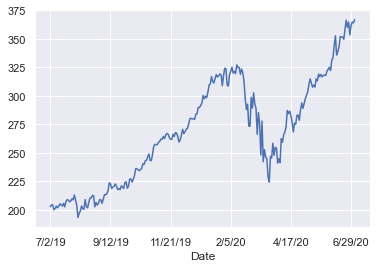

In [33]:
df.AAPL.plot.line()

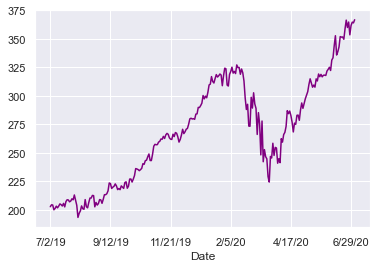

In [34]:
df.AAPL.plot.line(color='purple')

In [35]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-shift/

returns = df/df.shift(-1)
# returns = df['AAPL']/df['AAPL'].shift(-1)

,AAPL,AMZN,IBM
count,253.000000,253.000000,253.000000
mean,0.997985,0.998592,1.000911
std,0.025714,0.019824,0.025254
min,0.893010,0.931280,0.898464
25%,0.985724,0.989444,0.990470
50%,0.996443,0.997583,0.999666
75%,1.006968,1.007870,1.010321
max,1.147640,1.086037,1.147457


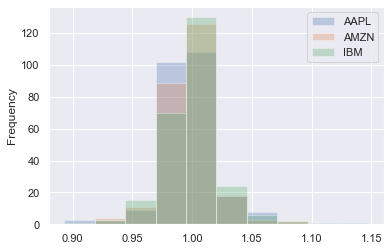

In [36]:
returns.plot.hist(alpha = 0.3)  
returns.describe()

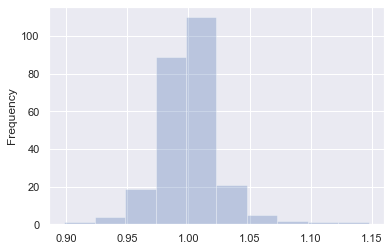

In [37]:
returns.IBM.plot.hist(alpha = 0.3)  

## FYI: New
## Rows:
### data.iloc[0] # first row of data frame
### data.iloc[1] # second row of data frame 
### data.iloc[-1] # last row of data frame 
## Columns:
### data.iloc[:,0] # first column of data frame 
### data.iloc[:,1] # second column of data frame
### data.iloc[:,-1] # last column of data frame

## Now, we will move on with our data analysies (using the original titanic_data set)

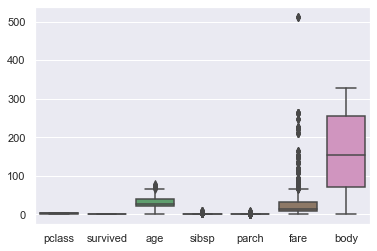

In [38]:
sns.boxplot(data=titanic_data)

## Well, the box plot is a reasonable start, but there are some columns we would like to remove:

We can remove the pclass, survived, sibsp, and parch since these are more like categorical variables.
It turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format the DataFrame.

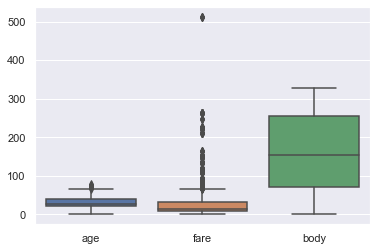

In [39]:
# Pre-format DataFrame
titanic_dataminus = titanic_data.drop(['pclass', 'survived', 'sibsp', 'parch'], axis=1)
 
# New boxplot using the updated/revised data frame
sns.boxplot(data=titanic_dataminus)

In [40]:
titanic_dataminus.head()

,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest
0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


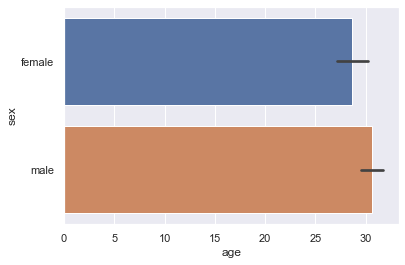

In [41]:
sns.barplot(x='age',y='sex', data=titanic_data) 

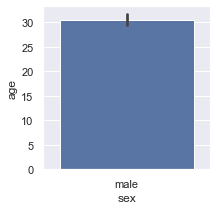

In [42]:
f, ax = plt.subplots(figsize=(3,3))
sns.barplot(x='sex', y='age', data=titanic_data[(titanic_data.sex == 'male')])

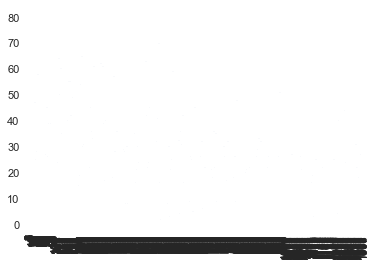

In [43]:
# The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position. 
# The iloc indexer syntax is df.iloc [<row selection>, <column selection>], which might be a source of confusion for R users.
# df.iloc[:,4] refers to the fifth column of data frame ('age' in the titanic_data data set)
# df.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns in the df dataframe.
# Check https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/ for more details

# define an image window
plt.figure() 
# We may use  the  kind parameter to specify plot style

titanic_data.iloc[:, 4].plot(kind='bar')  
plt.show()

In [44]:
# Again, let's take a look at the dataframe 
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [45]:
# Now, we will check the percentage of missing values
titanic_data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [46]:
# we will check the number of observations for the age variable
len(titanic_data['age'])

1309

In [47]:
# now we will focus only on the following three variables 
titanic_data = titanic_data[['ticket', 'cabin', 'age']]
titanic_data.head()
# type(titanic_data['age'])

,ticket,cabin,age
0,24160,B5,29.0000
1,113781,C22 C26,0.9167
2,113781,C22 C26,2.0000
3,113781,C22 C26,30.0000
4,113781,C22 C26,25.0000


## The following script reveals Python string concatenation
https://www.w3schools.com/python/gloss_python_string_concatenation.asp

In [48]:
titanic_data['cabin_num']=titanic_data['cabin'].str.extract('(\d+)')

# extract('(\d+)').str[1]
titanic_data['cabin_num'].head()

C:\Users\xiada\.conda\envs\carmapy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     5
1    22
2    22
3    22
4    22
Name: cabin_num, dtype: object

In [49]:
# \w, \W: ANY ONE word/non-word character. For ASCII, word characters are [a-zA-Z0-9_]
# The +, known as occurrence indicator (or repetition operator), indicates one or more 
# occurrences (1+) of the previous sub-expression.
titanic_data['result1'] = titanic_data['cabin'].str.extract('(\w+)') 
titanic_data['result1'].head()

C:\Users\xiada\.conda\envs\carmapy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0     B5
1    C22
2    C22
3    C22
4    C22
Name: result1, dtype: object

In [50]:
# \d, \D: ANY ONE digit/non-digit character. Digits are [0-9]

# result2 = titanic_data['cabin'].str.extract('(\d+)') 
titanic_data['result2'] = titanic_data['cabin'].str[-2]
titanic_data['result2'].head()

titanic_data['result5'] = titanic_data['cabin'].str[1:5]
titanic_data['result5'].head()

C:\Users\xiada\.conda\envs\carmapy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\xiada\.conda\envs\carmapy\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0       5
1    22 C
2    22 C
3    22 C
4    22 C
Name: result5, dtype: object

In [51]:
# \s, \S: ANY ONE space/non-space character. For ASCII, whitespace characters are [ \n\r\t\f]
titanic_data['result3'] = titanic_data['cabin'].str.extract('(\s+)')
titanic_data['result3'].head()

C:\Users\xiada\.conda\envs\carmapy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    NaN
1       
2       
3       
4       
Name: result3, dtype: object

In [52]:
# \s, \S: ANY ONE space/non-space character. For ASCII, whitespace characters are [ \n\r\t\f]
titanic_data['result3'] = titanic_data['cabin'].str.extract('(^\s+)')
titanic_data['result3'].head()

C:\Users\xiada\.conda\envs\carmapy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: result3, dtype: object

In [53]:
titanic_data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [54]:
n=len(titanic_data['age'])
get_sum=sum(titanic_data['age'])
mean = get_sum/n
print(mean)

nan


In [55]:
titanic_data.isnull().mean()

ticket       0.000000
cabin        0.774637
age          0.200917
cabin_num    0.779221
result1      0.774637
result2      0.779221
result5      0.774637
result3      1.000000
dtype: float64

In [56]:
print(titanic_data.age.median())

28.0


In [57]:
print(titanic_data.age.mean())

29.8811345124283


In [58]:
# Alternative, we can obtain the average age via the following script

mean_age = titanic_data['age'].mean()
print(mean_age)

29.8811345124283


In [59]:
n=len(titanic_data['age'])
print(n)

1309


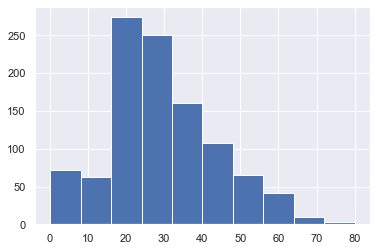

In [60]:
titanic_data.age.hist()

## the output shows that the maximum positive value is around 80. Thus, 99 or 999 can be 
## an adequate arbitrary value. Further, since the age column only contains positive values, 
## -1 can be another likely arbitrary value. Thus, we may replace the missing values in the 
## age column first by 99, and then by -1. 

In [61]:
mean_age = titanic_data['age'].mean()

titanic_data101 = pd.read_csv("titanic.csv", na_values = missing_values, skip_blank_lines=True)
titanic_data101['age_99']=titanic_data.age.fillna(99)
titanic_data101['age_minus1']=titanic_data.age.fillna(-1)
titanic_data101['age_mean']=titanic_data.age.fillna(mean_age)
titanic_data101.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_99,age_minus1,age_mean
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,29.0000,29.0000
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,0.9167,0.9167
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,2.0000,2.0000
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,30.0000,30.0000
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,25.0000,25.0000


In [62]:
# We can tell that it's inadequate to fill the missing value with 99

titanic_data101['age_99'].mean()

43.76827097020627

In [63]:
titanic_data101['age_mean'].mean()

29.881134512428297

In [64]:
len(titanic_data101['age_99'])

1310

In [65]:
titanic_data101['fare'].isnull().mean()
# len(titanic_data101['fare'].isnull())

0.0015267175572519084

In [66]:
# Calculate the number of missing observations in each column

titanic_data101.isnull().sum()

pclass           1
survived         1
name             1
sex              1
age            264
sibsp            1
parch            1
ticket           1
fare             2
cabin         1015
embarked         3
boat           824
body          1189
home.dest      565
age_99           1
age_minus1       1
age_mean         1
dtype: int64

In [67]:
# Alternatively, we may calculate the number of missing responses in each column this way:
# https://stackoverflow.com/questions/41681693/pandas-isnull-sum-with-column-headers

pd.isnull(titanic_data101).sum()

pclass           1
survived         1
name             1
sex              1
age            264
sibsp            1
parch            1
ticket           1
fare             2
cabin         1015
embarked         3
boat           824
body          1189
home.dest      565
age_99           1
age_minus1       1
age_mean         1
dtype: int64

## Warning: the file with a name of titanic in the following script is NOT the same as the one saved in our hard drive

In [68]:
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [8, 6]
#sns.set_style('darkgrid')

titanic_data1=sns.load_dataset("titanic")

# titanic_data1a=titanic_data1[['age']]
titanic_data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [69]:
titanic_data1.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [70]:
titanic_data.isnull().mean()

ticket       0.000000
cabin        0.774637
age          0.200917
cabin_num    0.779221
result1      0.774637
result2      0.779221
result5      0.774637
result3      1.000000
dtype: float64

In [71]:
titanic_data1.age.mode()

0    24.0
dtype: float64

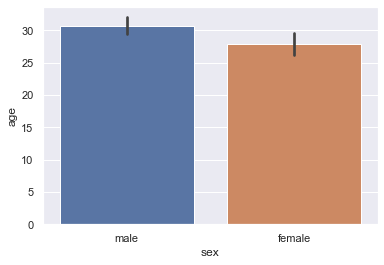

In [72]:
sns.barplot(x='sex', y='age', data=titanic_data1) 

In [73]:
len(titanic_data1['sex'])

891

In [74]:
titanic_data1['age_mode']=titanic_data1.age.fillna(24)
titanic_data1.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,24.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.0


In [75]:
titanic_data1.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
age_mode       0.000000
dtype: float64

In [76]:
titanic_data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


## Simple scatter plots

https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

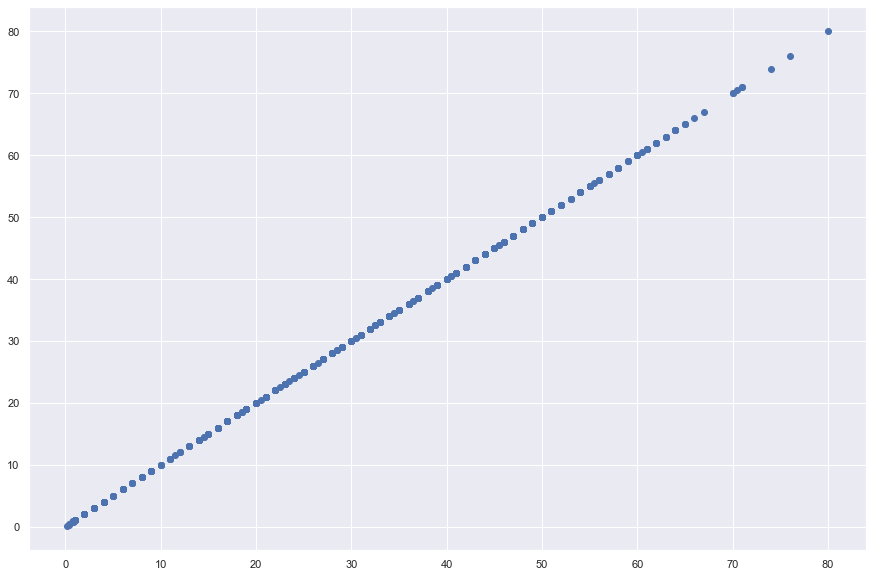

"\nfrom scipy.stats import pearsonr\ncorr, _ = pearsonr(titanic_data['fare'], titanic_data['age_99'])\nprint('Pearsons correlation: %.3f' % corr)\n"

In [77]:
# Scatter plot 
# This scatter plot is simply for the demo practice purpose. Typically, I would NOT 
# create a scatter plot by a variable with itself (check the correlation cefficiet
# age and age_99) 

# The Pearson correlation coefficient is often used to summarize the strength of the 
# relationship between two continuous variables.

titanic_data = pd.read_csv("titanic.csv")
titanic_data['age_99']=titanic_data.age.fillna(99)
plt.figure(figsize=(15,10))
plt.scatter(titanic_data['age'], titanic_data['age_99'])
plt.show()


# calculate Pearson's correlation (be aware of the error message due to the missing
# values in variable age)
'''
from scipy.stats import pearsonr
corr, _ = pearsonr(titanic_data['fare'], titanic_data['age_99'])
print('Pearsons correlation: %.3f' % corr)
'''

In [78]:
titanic_data101[['age', 'age_99']].corr()

,age,age_99
age,1.0,1.0
age_99,1.0,1.0


## Spearman's correlation coefficient could be calculated when the variables are not continus in nature. Specifically, Spearman's correlation coefficient (ρ) measures the strength and direction of association between two ranked variables, and its formula is  covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

'''
from scipy.stats import spearmanr
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)
'''

In [79]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

## A particularly interesting backend, provided by IPython, is the inline backend. This is available only for the Jupyter 
## Notebook and the Jupyter QtConsole. It can be invoked as follows:
## With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
## directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

## plt.figure(figsize=(a, b)) 
### figsize is used to decide the size of the figure, in which a refers to the width and b refers to the height (inches)
### plt.subplot(111) refers to plt.subplot(1, 1, 1). A more completed script would be plt.subplot(nrows=1, ncols=1, index=1)

<Figure size 864x864 with 0 Axes>

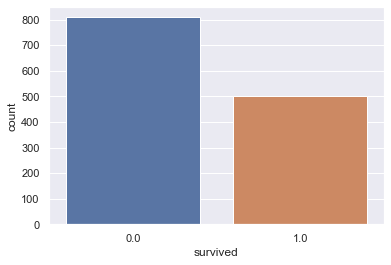

<Figure size 864x864 with 0 Axes>

In [80]:
sns.countplot(x='survived', data=titanic_data)
plt.figure(figsize=(12,12))

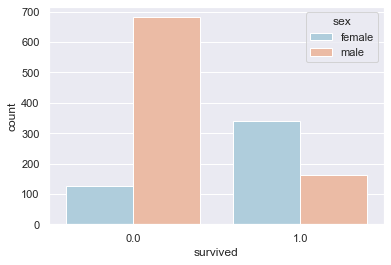

In [81]:
# Survival by Passenger Class

sns.countplot(x='survived',hue='sex',data=titanic_data,palette='RdBu_r')

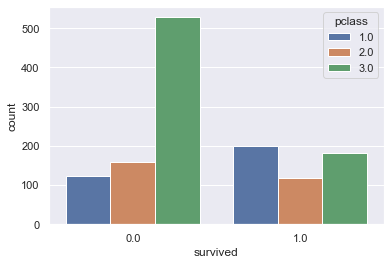

In [82]:
sns.countplot(x='survived',hue='pclass',data=titanic_data)

In [83]:
titanic_data.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
age_99       float64
dtype: object

In [84]:
titanic_data.mean()

pclass        2.294882
survived      0.381971
age          29.881135
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
age_99       43.810433
dtype: float64

In [85]:
titanic_data.isnull().mean()

pclass       0.000763
survived     0.000763
name         0.000763
sex          0.000763
age          0.201527
sibsp        0.000763
parch        0.000763
ticket       0.000763
fare         0.001527
cabin        0.774809
embarked     0.002290
boat         0.629008
body         0.907634
home.dest    0.431298
age_99       0.000000
dtype: float64

## Since we will only focus on encoding the categorical variable (e.g., sex), we are going to include only the object columns in the dataframe. Pandas has a helpful select_dtypes function which we can use to build a new dataframe containing only the object columns.

In [86]:
obj_titanic_data = titanic_data.select_dtypes(include=['object']).copy()
obj_titanic_data.head()

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [87]:
# To avoid possible confusion and to simplize the coding, let's relabel the data set as df
df = titanic_data
df.head()

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

obj_df[obj_df.isnull().any(axis=1)]

,name,sex,ticket,cabin,embarked,boat,home.dest
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
7,"Andrews, Mr. Thomas Jr",male,112050,A36,S,NaN,"Belfast, NI"
9,"Artagaveytia, Mr. Ramon",male,PC 17609,NaN,C,NaN,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN
1308,"Zimmerman, Mr. Leo",male,315082,NaN,S,NaN,NaN


## When we attempt to convert DataFrame to CSV, the r right before the file path represents the r character (to take care of any symbols within the path name, such as the backslash symbol). 

In [88]:
# default CSV
csv_data = titanic_data.to_csv(r'C:\Users\xiada\Documents\export_dataframe1.csv')

pclass       0.000763
survived     0.000763
name         0.000763
sex          0.000763
age          0.201527
sibsp        0.000763
parch        0.000763
ticket       0.000763
fare         0.001527
cabin        0.774809
embarked     0.002290
boat         0.629008
body         0.907634
home.dest    0.431298
age_99       0.000000
dtype: float64

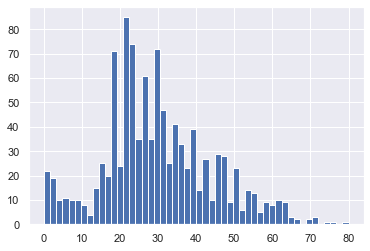

In [89]:
df.age.hist(bins=50)
df.isnull().mean()

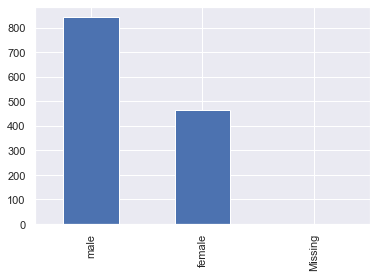

In [90]:
df.sex.fillna('Missing', inplace = True)
obj_df
df.sex.value_counts().sort_values(ascending=False).plot.bar()

In [91]:
obj_df["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [92]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
age_99       float64
dtype: object

In [93]:
numerical = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'age_99']  
categorical = [
    'name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'
]

df_titanic = titanic_data[numerical + categorical]
titanic_data.shape

(1310, 15)

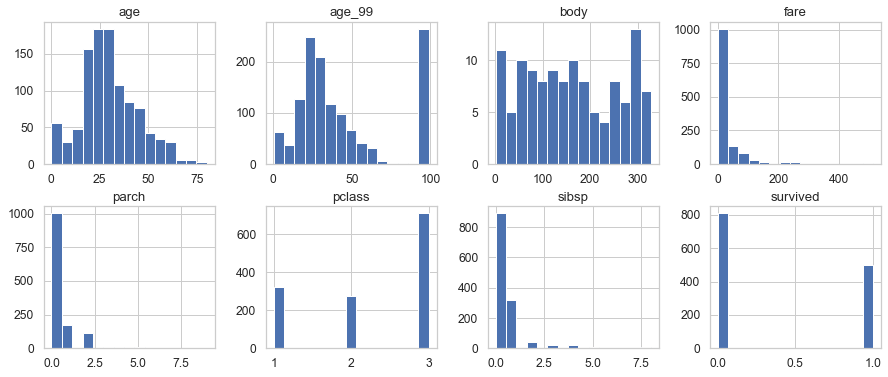

In [94]:
# Plesae ensure that the seaborn library has been installed and imported; if not, try "import seaborn as sns"

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

df_titanic[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

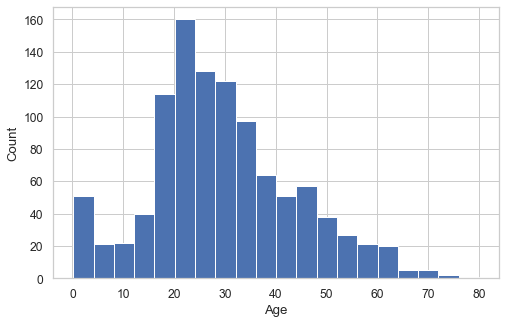

In [95]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    titanic_data['age'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count');

# New: Heat Map 
https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-2/

In [96]:
# The Statsmodels package provides a number of basic statistical models like linear models, GLMs, ANOVA, and more.
# For more info see http://www.statsmodels.org.

# load statsmodels
import statsmodels.api as sm

# make up some data
X = np.array(stats.norm().rvs(100)).reshape(25,4)
beta = [3,0.5,1,2]
epsilon = stats.norm().rvs(25)
Y = np.dot(X,beta) + epsilon

# fit a model
lm = sm.OLS(Y,X)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              43.84
Date:                Fri, 03 Jul 2020   Prob (F-statistic):                    6.64e-10
Time:                        06:00:07   Log-Likelihood:                         -34.829
No. Observations:                  25   AIC:                                      77.66
Df Residuals:                      21   BIC:                                      82.53
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8641      0.263     10.876      0.000       2.316       3.412
x2             0.2414      0.255      0.948      0.354      -0.288       0.771
x3             0.7435      0.225      3.299      0.003       0.275       1.212
x4             1.9761      0.238      8.307      0.000       1.481       2.471
==============================================================================
Omnibus:                        0.851   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.758
Skew:                           0.384   Prob(JB):                        0.685
Kurtosis:                       2.630   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression: Sklearn and Statsmodels

https://medium.com/@subarna.lamsal1/multiple-linear-regression-sklearn-and-statsmodels-798750747755

In [97]:
# fit a model (but we would encounter a problem ... take a look at the error message and see whether you can resolve it on your own)
lm = sm.OLS(titanic_data['fare'],titanic_data['age'])
lm_fit = lm.fit()
lm_fit.summary()

MissingDataError: exog contains inf or nans

In [ ]:
# fit a model
lm = sm.OLS(titanic_data['fare'],titanic_data['age'], missing='drop')
lm_fit = lm.fit()
lm_fit.summary()

#  <span style="color:red">Appendix</span>

## Breakout Exercises¶

## Exercie 0_3.1

## Please draw a bar chart using the pclass variable.

<br>


## Exercise 0_3.2

## Please draw a scatter plot in which the x axis refers to age and the y axis refers to fare (and use different colors to reveal the three different cabin classes)

## What's next to explore? (you may already be aware of a few by now).
## 1. www.stackoverflow.com
## 2. https://github.com/python
## 3. https://www.kaggle.com/c/titanic
## 4. https://www.w3schools.com/python/default.asp
## 5. https://www.tutorialspoint.com/execute_python_online.php
## 6. https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html 

In [ ]:
## A summer 2020 FREE Python Learning Event (registration in advance is needed)
# Use python's webbrowser module to open links:
import webbrowser
webbrowser.open("https://www.meetup.com/New-York-Data-Science-Analytics/events/271321840/")

In [ ]:
## We may also output the text to a HTML file and open the HTML file in a web browser for the link:
## We can use "w" letter in the argument to indicate write and will create a file if it does not exist yet
## Plus sign indicates both read and write
open("link.html", "w+").write('<a href="https://www.uww.edu/"> Link </a>')

## In addition to Python, R is also a popular freeware package that can be used to analyze data and present the data analysis outcomes. If you would like to explore R, here is a good point of departure: https://github.com/jenineharris/R-you-ready-demo/

## However, in terms of "return on time investment", I would suggest that spending time in learning Python would be a better option than learning R (Summer 2020). You (the learner) make the final call ...

## If we encounter challenges when we attempt to decode a document, we may explore/check the original document's coding format or simply try a few commonly used coding format (e.g., gbk, utf-8, and ansi"). 

for i in ('gbk','utf-8','gb18030','ansi'): 
    try:
        data = pd.read_csv('./data.csv',encoding = i)
        print(i + 'decode success')
    except:
        print(i + 'decode fail')

# <span style="color:red">Happy learning & Happy living!</span>
## ~ Max Hsu 2020